# Uniform priors in `easyscience`

Bayesian methods are becoming more and more popular in the analysis of model-dependent data, in particular in neutron scattering. 
Thinking about data [probabilistically](./prob_data.ipynb), helps towards an understanding of Bayesian modelling.
Bayesian modelling is about how to include prior knowledge about the system or parameters under study in the analysis. 

The same data as previously will be used again. 

In [1]:
import numpy as np

np.random.seed(123)

a_true = -0.9594
b_true = 7.294
c_true = 3.102

N = 25
x = np.linspace(0, 10, N)
yerr = 1 + 1 * np.random.rand(N)
y = a_true * x ** 2 + b_true * x + c_true
y += np.abs(y) * 0.1 * np.random.randn(N)

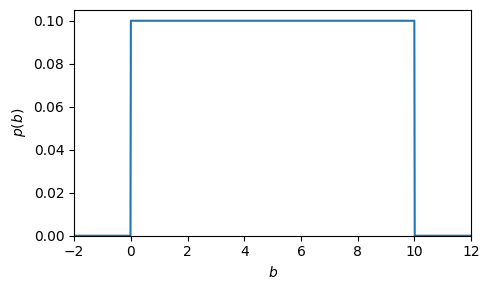

In [2]:
import matplotlib.pyplot as plt
from myst_nb import glue
from scipy.stats import uniform

_x = np.linspace(-2, 12, 1000)
fig, ax = plt.subplots(figsize=(5,3))
u = uniform(loc=0, scale=10)
ax.plot(_x, u.pdf(_x))
ax.set_ylim(0, None)
ax.set_xlim(_x.min(), _x.max())
ax.set_xlabel('$b$')
ax.set_ylabel('$p(b)$')
fig.tight_layout()
glue("uniform_fig", fig, display=False)

The most straightforward way to include prior knowledge in some analysis is through the use of bounded parameters. 
Bounded parameters cannot have values less than some lower bound or greater than some upper bound, as the probability of the parameters having these values is zero. 
For example, if the parameter `b` from the quadratic model has bounds of 0 and 10, then there is an equal probability that the value of `b` can be anything in between 0 and 10, and a probability of 0 outside those bounds, i.e., it has a uniform prior probability distribution ({numref}`uniform`).

```{glue:figure} uniform_fig
:name: "uniform"

A uniform distribution (blue line), from 0 to 10.
```

Information about bounds can be included in `easyscience` parameters as `min` and `max` values.

In [3]:
from easyscience.Objects.new_variable import Parameter

a = Parameter(name='a', value=a_true, fixed=False, min=-5.0, max=0.5)
b = Parameter(name='b', value=b_true, fixed=False, min=0, max=10)
c = Parameter(name='c', value=c_true, fixed=False, min=-20, max=50)

We can then perform the analysis in the same fashion as previously, however, this time the bounds will be respected. 

In [4]:
from easyscience.Objects.ObjectClasses import BaseObj
from easyscience.fitting import Fitter

def math_model(x, *args, **kwargs):
    return a.value * x ** 2 + b.value * x + c.value

quad = BaseObj(name='quad', a=a, b=b, c=c)
f = Fitter(quad, math_model)

res = f.fit(x=x, y=y, weights=yerr)

a, b, c

(<Parameter 'a': -0.9206 ± 0.0373, bounds=[-5.0:0.5]>,
 <Parameter 'b': 7.0861 ± 0.3947, bounds=[0.0:10.0]>,
 <Parameter 'c': 2.0548 ± 0.8492, bounds=[-20.0:50.0]>)

Currently `easyscience` only supports uniform prior probability distributions, however, there are plans to extend this in the future. 